# Logistic Regression
## One-Node Neural Network Classifier
### 100 random points colored by x2 > x1

In [6]:
import sys
print(sys.version)

3.6.1 (v3.6.1:69c0db5, Mar 21 2017, 18:41:36) [MSC v.1900 64 bit (AMD64)]


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


X = np.random.rand(2,200)

Y = (X[0]>.2*X[1]).reshape(1,200)
cols = np.where(X[0]>.2*X[1],'r','b')

plt.scatter(X[0],X[1], color =cols)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

### Create Tensorflow Graph

In [129]:
y = tf.placeholder(tf.float32,[None,1])
x = tf.placeholder(tf.float32,[None,2])

W = tf.Variable(tf.zeros([2,1]))
B = tf.Variable(tf.zeros([1,1]))


node = tf.add(tf.matmul(x,W),B)
z = tf.sigmoid(node)


### Implement Cost Function

In [130]:
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = node, labels = y))

optimizer = tf.train.GradientDescentOptimizer(.1)

train = optimizer.minimize(loss)

### Begin TensorFlow Session

In [131]:
sess = tf.Session()
init= tf.global_variables_initializer()
sess.run(init)


### Train Neural Network

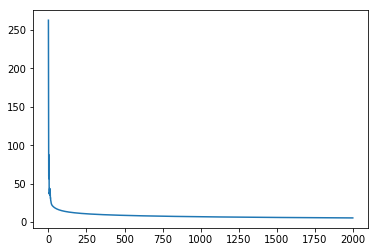

In [132]:
loss_data= []
for i in range(2000):
    sess.run(train,feed_dict={x:X.T,y:Y.T})
    loss_data.append(sess.run(loss,feed_dict={x:X.T,y:Y.T}))

plt.plot(range(2000),loss_data)
plt.show()

### Create new data for testing

In [136]:
X_test = np.random.rand(2,1000)

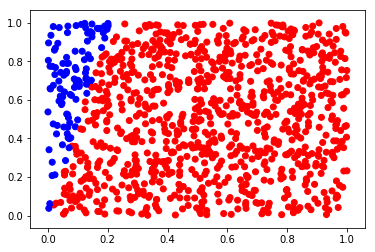

In [137]:

cols = np.where(sess.run(z,feed_dict={x:(X_test.T)}).T[0] > .5, 'r', 'b')
plt.scatter(X_test[0],X_test[1], color = cols)
plt.show()

In [258]:
Y_train

array([[1, 0, 1, ..., 1, 1, 1]])

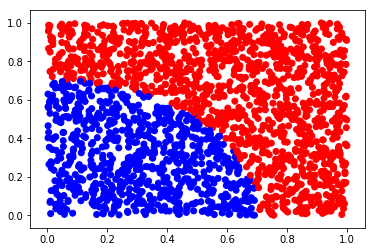

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


X_train = np.random.rand(2,2000)

Y_train = (X_train[1]**2 + X_train[0]**2>.5).astype(int).reshape(1,2000)

X_test = np.random.rand(2,1000)

Y_test = (X_test[1]**2 + X_test[0]**2>.5).astype(int).reshape(1,1000)

cols = np.where(Y_train[0] > .5,'r','b')
cols_test = np.where(Y_test[0] > .5,'r','b')

plt.scatter(X_train[0],X_train[1], color =cols)
plt.show()

In [31]:
tf.reset_default_graph()
layer_dims = [2,2,2,1]

tf.reset_default_graph()
    
preds_train,preds_test,train_acc,test_acc = model(layer_dims,X_train,Y_train,X_test,Y_test,epochs=8000,learning_rate=.005)

0.6125
0.611


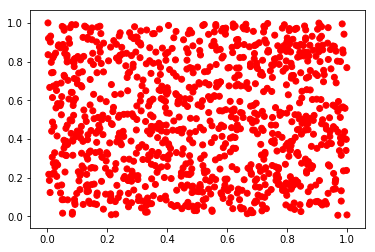

In [32]:
print(train_acc)
print(test_acc)
cols = np.where(preds_test.T[0],'r','b')
plt.scatter(X_test[0],X_test[1], color =cols)
plt.show()

In [2]:
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(shape=[None,n_x],dtype = tf.float32)
    Y = tf.placeholder(shape=[None,n_y],dtype = tf.int32)
    
    return X,Y

def initialize_parameters(layer_dims):
    
    parameters = {}
    for l in range(len(layer_dims)-1):
        
        W = tf.get_variable("W" + str(l+1),[layer_dims[l],layer_dims[l+1]])
        B = tf.Variable(tf.zeros([1,layer_dims[l+1]]))
        
        parameters["W" + str(l+1)] = W
        parameters["B" + str(l+1)] = B
        
    
    return parameters

def forward_propagation(X,parameters,layer_dims):
    
    A = X
    for l in range(len(layer_dims)-1):
        W = parameters["W" + str(l+1)]
        B = parameters["B" + str(l+1)]
        Z = tf.add(tf.matmul(A,W),B)
        
        if l < len(layer_dims) - 2:
            A = tf.nn.relu(Z)
        else:
            A = tf.nn.sigmoid(Z)
    
    return A,Z

def compute_loss(Z,Y):
    
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = Z , labels = tf.cast(Y,tf.float32)))
    
    return loss

def model(layer_dims,X_train,Y_train,X_test,Y_test,learning_rate = .001,epochs = 1000, batch_size = 32):
    
    tf.reset_default_graph()
    
    X,Y = create_placeholders(X_train.shape[0],Y_train.shape[0])
    
    parameters = initialize_parameters(layer_dims)
    
    AL,ZL = forward_propagation(X,parameters,layer_dims)
    
    loss = compute_loss(ZL,Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

    train = optimizer.minimize(loss)
    
    sess = tf.Session()
    init= tf.global_variables_initializer()
    sess.run(init)
    
    loss_data = []
    for epoch in range(epochs):
        for m in range(0,int(X_train.shape[1] / batch_size)):
            X_batch = X_train.T[m*batch_size:(m+1)*batch_size]
            Y_batch = Y_train.T[m*batch_size:(m+1)*batch_size]
            sess.run(train,feed_dict={X:X_batch,Y:Y_batch})
        

        X_batch = X_train.T[(m+1)*batch_size:]
        Y_batch = Y_train.T[(m+1)*batch_size:]
        sess.run(train,feed_dict={X:X_batch,Y:Y_batch})
        loss_data.append(sess.run(loss,feed_dict={X:X_batch,Y:Y_batch}))

        epoch = epoch + 1
    
    parameters = sess.run(parameters)
    
    predictions = tf.cast(tf.greater(AL,.5),tf.int32)  
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions,Y),tf.float32))
    
    train_accuracy = sess.run(accuracy,feed_dict={X:X_train.T,Y:Y_train.T})
    test_accuracy = sess.run(accuracy,feed_dict={X:X_test.T,Y:Y_test.T})
    
    preds_train = sess.run(tf.cast(predictions,tf.int32),feed_dict={X:X_train.T,Y:Y_train.T})
    preds_test = sess.run(tf.cast(predictions,tf.int32),feed_dict={X:X_test.T,Y:Y_test.T})
    
    return preds_train,preds_test,train_accuracy,test_accuracy


    

In [14]:
def initialize_parameters():
    
    W1 = tf.get_variable("W1",[2,l1],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B1 = tf.Variable(tf.zeros([1,l1]))
    
    W2 = tf.get_variable("W2",[l1,l2],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B2 = tf.Variable(tf.zeros([1,l2]))
    
    W3 = tf.get_variable("W3",[l2,1],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B3 = tf.Variable(tf.zeros([1,1]))

def create_graph(l1,l2,learning_rate):

    y = tf.placeholder(tf.float32,[None,1])
    x = tf.placeholder(tf.float32,[None,2])

    W1 = tf.get_variable("W1",[2,l1],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B1 = tf.Variable(tf.zeros([1,l1]))

    node1 = tf.add(tf.matmul(x,W1),B1)
    z1 = tf.nn.relu(node1)

    W2 = tf.get_variable("W2",[l1,l2],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B2 = tf.Variable(tf.zeros([1,l2]))
    node2 = tf.add(tf.matmul(z1,W2),B2)

    z2 = tf.nn.relu(node2)

    W3 = tf.get_variable("W3",[l2,1],initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    B3 = tf.Variable(tf.zeros([1,1]))
    node3 = tf.add(tf.matmul(z2,W3),B3)

    z3 = tf.nn.sigmoid(node3)

    loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits = node3, labels = y))

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)

    train = optimizer.minimize(loss)
    
    return z3, loss, train

def train_model(X_train,Y_train,train,epochs,batch_size):
    
    sess = tf.Session()
    init= tf.global_variables_initializer()
    sess.run(init)

    loss_data= []


    for epoch in range(epochs):
        for m in range(0,int(X.shape[1] / batch_size)):
            X_batch = X_train.T[m*batch_size:(m+1)*batch_size]
            Y_batch = Y_train.T[m*batch_size:(m+1)*batch_size]
            sess.run(train,feed_dict={x:X_batch,y:Y_batch})
        

        X_batch = X_train.T[(m+1)*batch_size:]
        Y_batch = Y_train.T[(m+1)*batch_size:]
        sess.run(train,feed_dict={x:X_batch,y:Y_batch})
        loss_data.append(sess.run(loss,feed_dict={x:X_batch,y:Y_batch}))

        epoch = epoch + 1
    
    plt.plot(range(len(loss_data)),loss_data)
    plt.show()

    Y_pred = np.where(sess.run(z3,feed_dict={x:(X.T)}).T[0] < .5, False, True)
    acc_train = np.sum(Y_pred == Y) / Y.shape[1]

    print("Accuracy on the training set:" + str(acc_train))

    X_test = np.random.rand(2,1000)
    Y_test = (X_test[1]>np.sin(4*X_test[0])).reshape(1,1000)

    Y_pred = np.where(sess.run(z3,feed_dict={x:(X_test.T)}).T[0] < .5, False, True)
    acc_test = np.sum(Y_pred == Y_test) / Y_test.shape[1]

    print("Accuracy on the testing set:" + str(acc_test))

In [19]:
sess = tf.Session()
init= tf.global_variables_initializer()
sess.run(init)
sess.run(train,{x:X})

NameError: name 'x' is not defined

In [15]:
tf.reset_default_graph()
z3,loss,train = create_graph(4,2,.01)
train_model(X,Y,train,100,32)

NameError: name 'x' is not defined

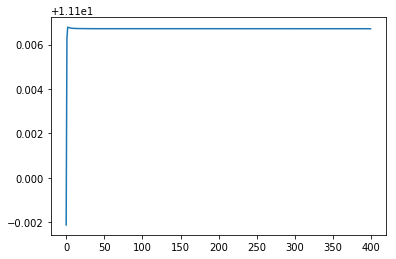

Accuracy on the training set:0.4975
Accuracy on the testing set:0.482


In [3]:
sess = tf.Session()
init= tf.global_variables_initializer()
sess.run(init)

loss_data= []
#for i in range(30000):
#    sess.run(train,feed_dict={x:X.T,y:Y.T})
#    loss_data.append(sess.run(loss,feed_dict={x:X.T,y:Y.T}))

for epoch in range(400):
    for m in range(0,int(X.shape[1] / 32)):
        X_batch = X.T[m*32:(m+1)*32]
        Y_batch = Y.T[m*32:(m+1)*32]
        sess.run(train,feed_dict={x:X_batch,y:Y_batch})
        

    X_batch = X.T[(m+1)*32:]
    Y_batch = Y.T[(m+1)*32:]
    sess.run(train,feed_dict={x:X_batch,y:Y_batch})
    loss_data.append(sess.run(loss,feed_dict={x:X_batch,y:Y_batch}))

    epoch = epoch + 1
    
plt.plot(range(len(loss_data)),loss_data)
plt.show()

Y_pred = np.where(sess.run(z3,feed_dict={x:(X.T)}).T[0] < .5, False, True)
acc_train = np.sum(Y_pred == Y) / Y.shape[1]

print("Accuracy on the training set:" + str(acc_train))

X_test = np.random.rand(2,1000)
Y_test = (X_test[1]>np.sin(4*X_test[0])).reshape(1,1000)

Y_pred = np.where(sess.run(z3,feed_dict={x:(X_test.T)}).T[0] < .5, False, True)
acc_test = np.sum(Y_pred == Y_test) / Y_test.shape[1]

print("Accuracy on the testing set:" + str(acc_test))

In [128]:
import tensorflow as tf
# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)

node = tf.add(b,tf.multiply(W,x))

y = tf.placeholder(tf.float32)

# loss
loss = tf.reduce_sum(tf.square(node - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

# training data
x_train = [ 81.88242671 , 67.64221061,  50.2922163 ]
y_train = [ 164.76485341,  136.28442123 , 101.58443261]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong

In [132]:
sess.run(train, {x: x_train, y: y_train})
sess.run(loss,{x: x_train, y: y_train})

1.3440857e+24